# Problem Description

The client has asked our team to assess the quality of their data; as well as make recommendations on ways to clean the underlying data and mitigate these issues. 

# Imports

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srn

# Loading Data

In [ ]:
df_transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 1)
df_customer_demogr = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 3)
df_customer_address = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 4)

# Exploratory Data Analysis

## Examining transactions table

In [25]:
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [26]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### We can see that the 'product_first_sold_date' column is in an integer format. Let's change this to a date format.

In [27]:
df_transactions['product_first_sold_date'] = pd.to_datetime(df_transactions['product_first_sold_date'], origin='1899-12-30', unit='D')

In [28]:
df_transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


### Check if there are nulls

In [29]:
null_counts = pd.isnull(df_transactions).sum()
null_counts

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

### Since only a small number of lines are empty, let's remove them

In [30]:
df_transactions.dropna(inplace=True)

### The "transaction_id" field is a unique identifier and therefore cannot have duplicate values. Let's check:

In [31]:
duplicates = df_transactions[df_transactions['transaction_id'].duplicated(keep=False)]
duplicates

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


### Here, let's look at the value range of the "customer_id" value. The goal is to compare this range with the records in the Customer Demographic Table (where "customer_id" is the primary key) and ensure that all data is in sync.

<Axes: xlabel='customer_id'>

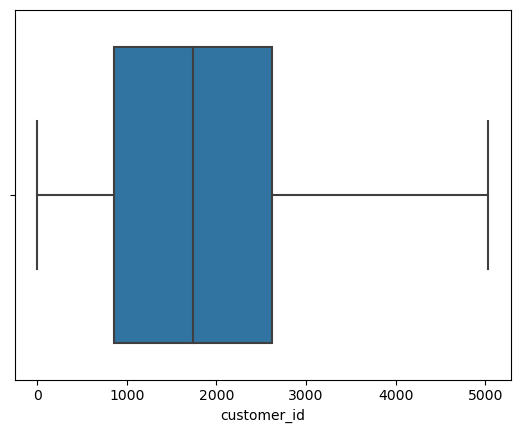

In [32]:
srn.boxplot(data=df_transactions, x='customer_id')

## Examining costumer demographic table

In [33]:
df_customer_demogr.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


### There are inconsistent values for the same attribute here. Let's fix it

In [ ]:
mapping = {
    'F': 'Female',
    'Femal': 'Female'
}


df_customer_demogr['gender'] = df_customer_demogr['gender'].replace(mapping)

In [35]:
df_customer_demogr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

### It looks like there are some null values

In [36]:
null_counts = pd.isnull(df_customer_demogr).sum()
null_counts

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

### Since only a small number of lines are empty, let's remove them.

In [37]:
df_customer_demogr.dropna(inplace=True)

In [38]:
df_customer_demogr.value_counts('gender')

gender
Female    1366
Male      1262
F            1
Femal        1
dtype: int64

### There are inconsistent values for the same attribute here. Let's fix it

In [39]:
mapping = {
    'F': 'Female',
    'Femal': 'Female'
}


df_customer_demogr['gender'] = df_customer_demogr['gender'].replace(mapping)

### The "customer_id" field is a unique identifier and therefore cannot have duplicate values. Let's check:

In [16]:
duplicates = df_customer_demogr[df_customer_demogr['customer_id'].duplicated(keep=False)]
duplicates

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Year


### There may be outliers in the 'DOB' column. Let's check and discard if there are any

In [41]:
df_customer_demogr['Year'] = pd.to_datetime(df_customer_demogr['DOB']).dt.year
min_year = 1920
max_year = 2020 
is_outlier = (df_customer_demogr['Year'] < min_year) | (df_customer_demogr['Year'] > max_year)
outliers = df_customer_demogr[is_outlier]
outliers

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Year


### Now, let's look at the value range of the "customer_id" value

<Axes: xlabel='customer_id'>

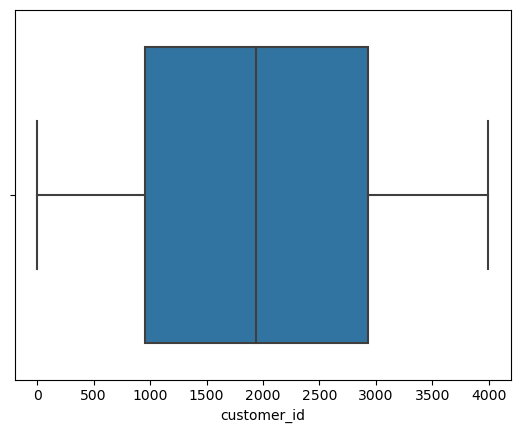

In [42]:
srn.boxplot(data=df_customer_demogr, x='customer_id')

### As we can see, there are additional 'customer_id' values in the Transaction Table, which do not match the values in the Customer Demographic Table. This indicates that the received data may not be synchronized with each other, which can skew the analysis results if there are missing data records. Only customers in the Customer Demographic list would be used as a training set for our model. 

## Examining costumer address table

In [43]:
df_customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [44]:
df_customer_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


### There are no null values here. Let's check duplicates

In [45]:
duplicates = df_customer_address[df_customer_address['customer_id'].duplicated(keep=False)]
duplicates

,customer_id,address,postcode,state,country,property_valuation


### Check if are there outliers in the 'postcode' column by boxplot

<Axes: xlabel='postcode'>

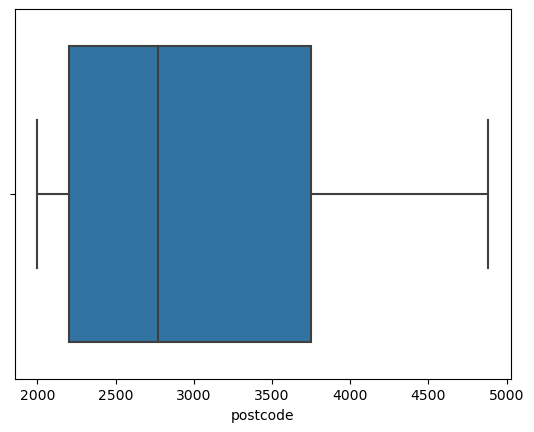

In [46]:
srn.boxplot(data=df_customer_address, x='postcode')